In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df= pd.read_csv(r"C:\Users\MWANGI\Documents\DSLab\top2000.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B


In [4]:
df["Country"].nunique()

# 60 Countries are represented

60

In [5]:
df["Country"].mode()

# United States has the most companies.

0    United States
Name: Country, dtype: object

Text(0.5, 1.0, 'Top five Countries with the highest number of companies')

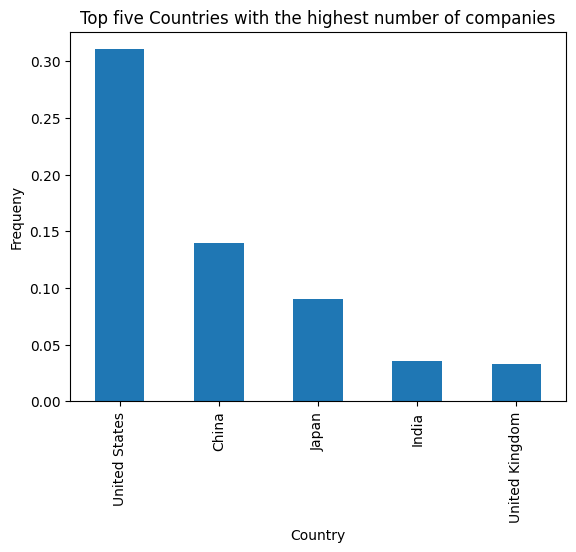

In [6]:
(df["Country"].sort_values().value_counts(normalize= True).head()).plot(kind= "bar")
plt.ylabel("Frequeny")
plt.title("Top five Countries with the highest number of companies")

In [7]:

df["Assets"]= df["Assets"].str.replace("$", "", regex= False) 


In [8]:
df["Assets"]= df["Assets"].str.split(" ",  expand=True)[0]

In [9]:
df["Assets"]= df["Assets"].str.replace(",", "", regex= False).astype(float)

In [10]:
df["Market Value"]= df["Market Value"].str.replace("$", "", regex= False)


In [11]:
df["Market Value"]= df["Market Value"].str.split(" ",  expand=True)[0]


In [12]:
df["Market Value"]= df["Market Value"].str.replace(",", "", regex= False).astype(float)


In [13]:
df["Sales"]= df["Sales"].str.replace("$", "", regex= False)


In [14]:
df["Sales"]= df["Sales"].str.split(" ",  expand=True)[0]


In [15]:
df["Sales"]= df["Sales"].str.replace(",", "", regex= False).astype(float)


In [16]:
df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,252.9,$50 B,4090.7,588.1
1,1,Berkshire Hathaway,United States,369.0,$73.4 B,1070.0,899.1
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,489.1,$116.9 B,661.5,1919.3
3,3,ICBC,China,223.8,$50.4 B,6586.0,215.2
4,4,Bank of America,United States,183.3,$25 B,3273.8,307.3


In [17]:
df["Profit"]= df["Profit"].str.replace("$", "", regex= False)

In [18]:
df["Profit"]= df["Profit"].str.split(" ",  expand=True)[0]

In [19]:
df["Profit"]= df["Profit"].str.replace(",", "", regex= False).astype(float)

In [20]:
df.head()

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,252.9,50.0,4090.7,588.1
1,1,Berkshire Hathaway,United States,369.0,73.4,1070.0,899.1
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,489.1,116.9,661.5,1919.3
3,3,ICBC,China,223.8,50.4,6586.0,215.2
4,4,Bank of America,United States,183.3,25.0,3273.8,307.3


In [21]:
columns= ["Sales", "Profit", "Assets", "Market Value"]
correlation_matrix = df[columns].corr()
correlation_matrix

,Sales,Profit,Assets,Market Value
Sales,1.000000,-0.142694,0.168282,0.274963
Profit,-0.142694,1.000000,-0.134561,-0.132669
Assets,0.168282,-0.134561,1.000000,0.139104
Market Value,0.274963,-0.132669,0.139104,1.000000


<Axes: >

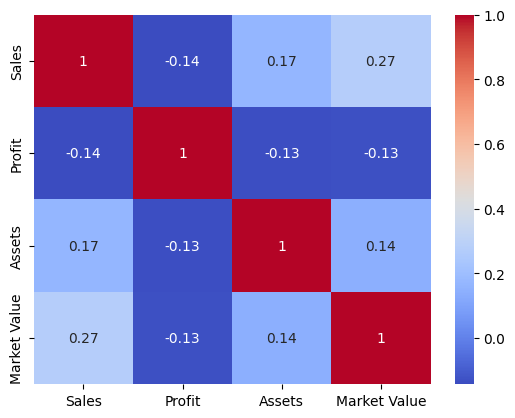

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


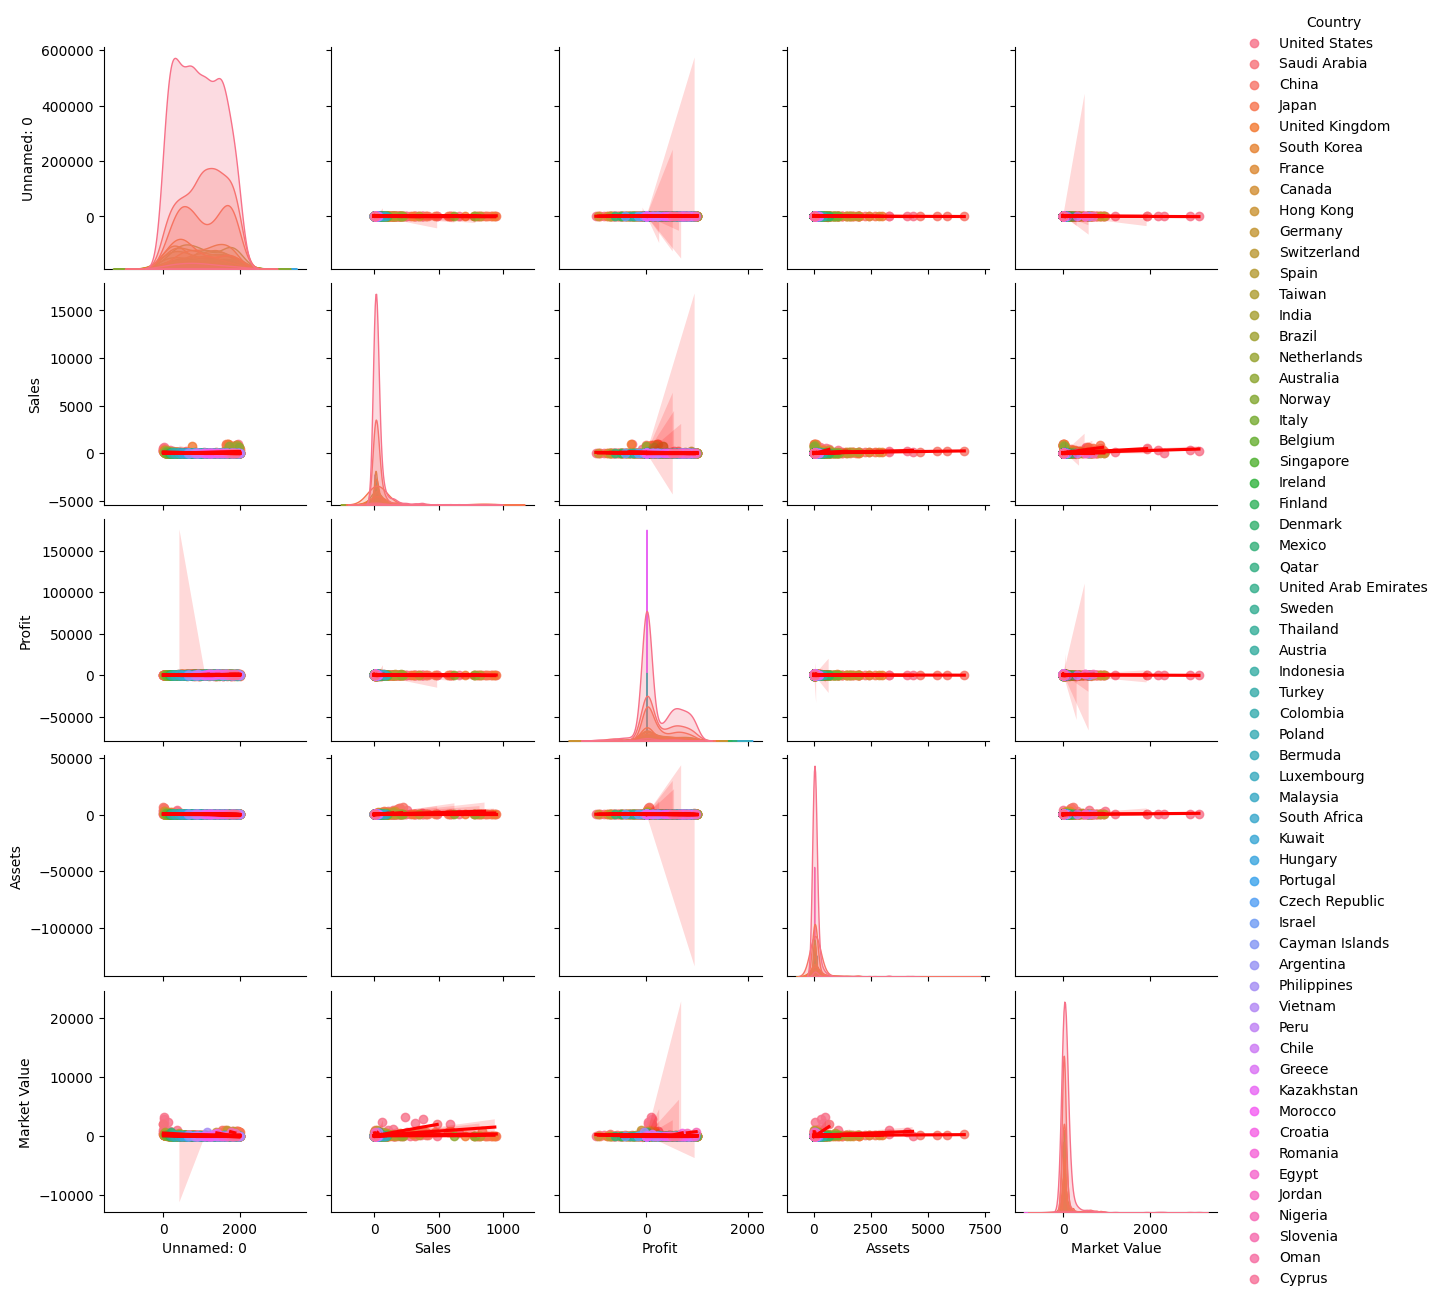

In [22]:
sns.pairplot(df, diag_kind= 'kde',hue="Country", kind= "reg", plot_kws={"line_kws":{"color": "red"}})

In [26]:
feature_matrix = ["Assets", "Profit", "Sales"]
target = "Market Value"

X_train = df[feature_matrix]
y_train = df[target]


In [25]:
y_mean= y_train.mean()
y_pred_baseline= y_mean* len(y_train)
mae= mean_absolute_error(y_train, y_pred_baseline)
mae

InvalidParameterError: The 'y_pred' parameter of mean_absolute_error must be an array-like. Got np.float64(110472.70000000001) instead.

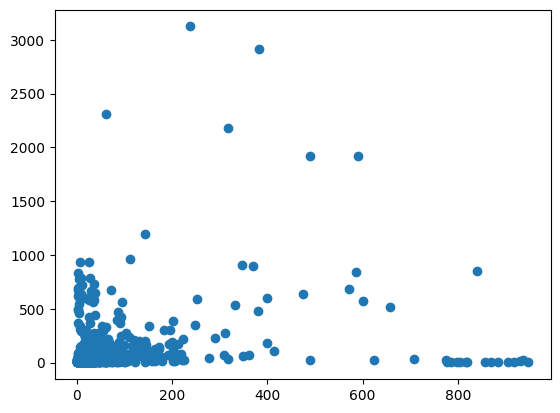

In [27]:
plt.scatter(x= df["Sales"], y= df["Market Value"] )

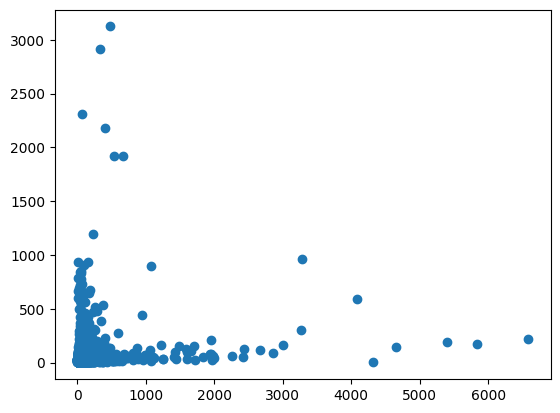

In [81]:
plt.scatter(x= df["Assets"], y= df["Market Value"])

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred= model.predict(X_train)
y_pred[:10]

array([309.18497026, 246.91411539, 283.52349293, 389.69656246,
       248.45762241, 327.44395584, 334.77424235, 165.15289755,
       348.44656234, 198.82015248])

In [92]:
intercept= round(model.intercept_, 2)
intercept

np.float64(44.72)

In [95]:
coefficient= model.coef_
coefficient.round(2)

array([ 0.04, -0.04,  0.45])

In [96]:
print(f"Market Value= {intercept} + {coefficient} * Sales")

Market Value= 44.72 + [ 0.03749199 -0.04212722  0.44760523] * Sales


InvalidParameterError: The 'y_pred' parameter of mean_absolute_error must be an array-like. Got np.float64(110472.70000000001) instead.